### To check how the L2CS gaze detection model works and what we can get from it

In [5]:
from pathlib import Path
from l2cs import Pipeline, render
import cv2
import torch
import matplotlib.pyplot as plt

import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent)) 
from scripts.face_cropper import run_face_tracking
import os

Make sure the pre-trained model is present in the models dir. Also the video. 

In [6]:
video_path = "../data/raw/video_example_peter.mp4"
model_path = "../models/yolov11m-face.pt"
output_dir="../outputs/new_faces"

In [ ]:
# Run script tp crop faces from the video to test the gaze estimation model

if os.path.exists(video_path):
    run_face_tracking(video_path, model_path, output_dir)
else:
    print(f"No video in {video_path}")

# This will save the cropped faces in the outputs/faces dir. 

Running detection on ../data/raw/video_example_peter.mp4
Processed 100 frames...
Processed 200 frames...
Processed 300 frames...
Processed 400 frames...
Processed 500 frames...
Processed 600 frames...
Processed 700 frames...
Processed 800 frames...
Processed 900 frames...
Processed 1000 frames...
Processed 1100 frames...
Processed 1200 frames...
Processed 1300 frames...
Processed 1400 frames...
Processed 1500 frames...
Processed 1600 frames...
Processed 1700 frames...
Processed 1800 frames...
Processed 1900 frames...
Processed 2000 frames...
Processed 2100 frames...
Processed 2200 frames...
Processed 2300 frames...
Saved 440 images of faces


In [8]:
# Initialize the gaze estimation pipeline

gaze_pipeline = Pipeline(
    weights="../models/L2CSNet_gaze360.pkl",
    arch='ResNet50',
    device=torch.device('cuda')
)

Gaze Estimation Result:
Pitch (degrees): -1.90
Yaw (degrees):   -0.32
Gaze Vector [x, y, z]: [-0.1009, 0.9465, 0.3065]
Face Score:      0.993


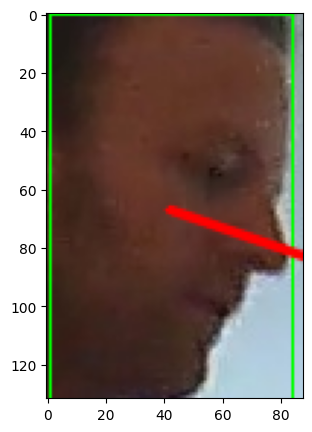

In [9]:
import math

# Load image which was generated by the face cropper script
img_path = "../outputs/faces/face_92_f2147.jpg"  
frame = cv2.imread(img_path)

# Convert BGR to RGB for matplotlib
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Run gaze estimation
results = gaze_pipeline.step(frame)

# print(results)

# Print gaze estimation outputs
print("Gaze Estimation Result:")
print(f"Pitch (degrees): {results.pitch[0]:.2f}")
print(f"Yaw (degrees):   {results.yaw[0]:.2f}")
pitch_rad = results.pitch[0]
yaw_rad = results.yaw[0]

# convert to gaze vector
x = -math.cos(pitch_rad) * math.sin(yaw_rad)
y = -math.sin(pitch_rad)
z = -math.cos(pitch_rad) * math.cos(yaw_rad)

print(f"Gaze Vector [x, y, z]: [{x:.4f}, {y:.4f}, {z:.4f}]")
print(f"Face Score:      {results.scores[0]:.3f}")


# Visualize
rendered = render(frame, results)
rendered_rgb = cv2.cvtColor(rendered, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.imshow(rendered_rgb)
plt.show()
